# Machine Learning Project

### Group Members

| **No.** | **Name**             | **Student ID**    |
|---------|----------------------|------------------|
| 1       | Ter Zheng Bin      | 1211103705       |
| 2       | Lai Cheng Yung     | 1211103705        |
| 3       | Darren Liau Kai Ze       | 1211103705      |
| 4       | Leong Jia Yi      | 1211103705       |


# Public Transportation Ridership Prediction in Malaysia  

## 1. YouTube Link for the Presentation  
https://www.youtube.com/watch?v=InPsMO1UJmg&ab_channel=TerZhengBin 

## 2. Reference

https://data.gov.my/data-catalogue/ridership_headline

The dataset used in this project is obtained from [Malaysia's Open Data Portal](https://data.gov.my/data-catalogue/ridership_headline).  
It contains historical ridership data of various public transportation systems, including LRT, MRT, Monorail, and KTM services across Malaysia.  
The dataset provides insights into passenger trends over time, enabling data-driven analysis and forecasting.  

## 3. Introduction and Project Goal  

### **Objective:**  
Based on historical ridership data, our main goal is to predict **public transportation ridership trends in Malaysia**.  

### **Specific Prediction Tasks:**  
1. **Short-term Forecasting:**  
   - Predict next-month ridership for **LRT Ampang and MRT Kajang** lines.  
2. **Key Factors Analysis:**  
   - Identify the most **influential variables** affecting ridership patterns.  
3. **Seasonal and Trend Analysis:**  
   - Examine **daily, weekly, and monthly variations** in ridership.  
   - Identify **high-demand and low-demand periods** to **optimize train schedules** and resource allocation.  

This study will provide actionable insights for transportation planners to improve public transit efficiency and passenger satisfaction.  

## Import Libaries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Load the dataset
data_path = 'ridership_headline.csv'
data = pd.read_csv(data_path)

## Exploratory Data Analysis (EDA) and Preprocessing

In [2]:
data.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2192 non-null   object 
 1   bus_rkl             1096 non-null   float64
 2   bus_rkn             1096 non-null   float64
 3   bus_rpn             1096 non-null   float64
 4   rail_lrt_ampang     2192 non-null   int64  
 5   rail_mrt_kajang     2192 non-null   int64  
 6   rail_lrt_kj         2192 non-null   int64  
 7   rail_monorail       2192 non-null   int64  
 8   rail_mrt_pjy        930 non-null    float64
 9   rail_ets            1539 non-null   float64
 10  rail_intercity      1539 non-null   float64
 11  rail_komuter_utara  1539 non-null   float64
 12  rail_tebrau         927 non-null    float64
 13  rail_komuter        458 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 239.9+ KB
None


In [4]:
display("\nSummary Statistics:")
display(data.describe())

'\nSummary Statistics:'

,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
count,1096.000000,1096.000000,1096.000000,2192.000000,2192.000000,2192.000000,2192.000000,930.000000,1539.000000,1539.000000,1539.000000,927.000000,458.000000
mean,170072.344891,2379.140511,38349.458029,127995.705292,142821.560675,172719.627737,33172.278741,87988.750538,8042.901235,2791.338532,8659.849903,8359.349515,35470.844978
std,46169.856328,503.095683,6430.953185,56924.121444,73425.470861,92102.923074,17258.735188,52153.919530,4525.916857,1844.627371,4594.335058,1000.697749,6630.316599
min,71611.000000,916.000000,20758.000000,6587.000000,4973.000000,7195.000000,1392.000000,12108.000000,50.000000,28.000000,436.000000,4348.000000,20236.000000
25%,136824.750000,2043.500000,34601.500000,87346.250000,82245.250000,104255.250000,17603.500000,24700.750000,3841.500000,1302.500000,4688.500000,7878.500000,30235.250000
50%,164275.500000,2385.000000,39256.500000,129210.500000,141602.500000,157179.000000,33673.500000,94454.500000,9882.000000,2482.000000,9253.000000,8472.000000,36775.000000
75%,213359.250000,2718.250000,43108.250000,168924.750000,204515.500000,253222.250000,48552.500000,134672.500000,11772.500000,4268.500000,12332.500000,9072.000000,38607.250000
max,264236.000000,4865.000000,56449.000000,258313.000000,367376.000000,352328.000000,91717.000000,220980.000000,14584.000000,7648.000000,21817.000000,10036.000000,89320.000000


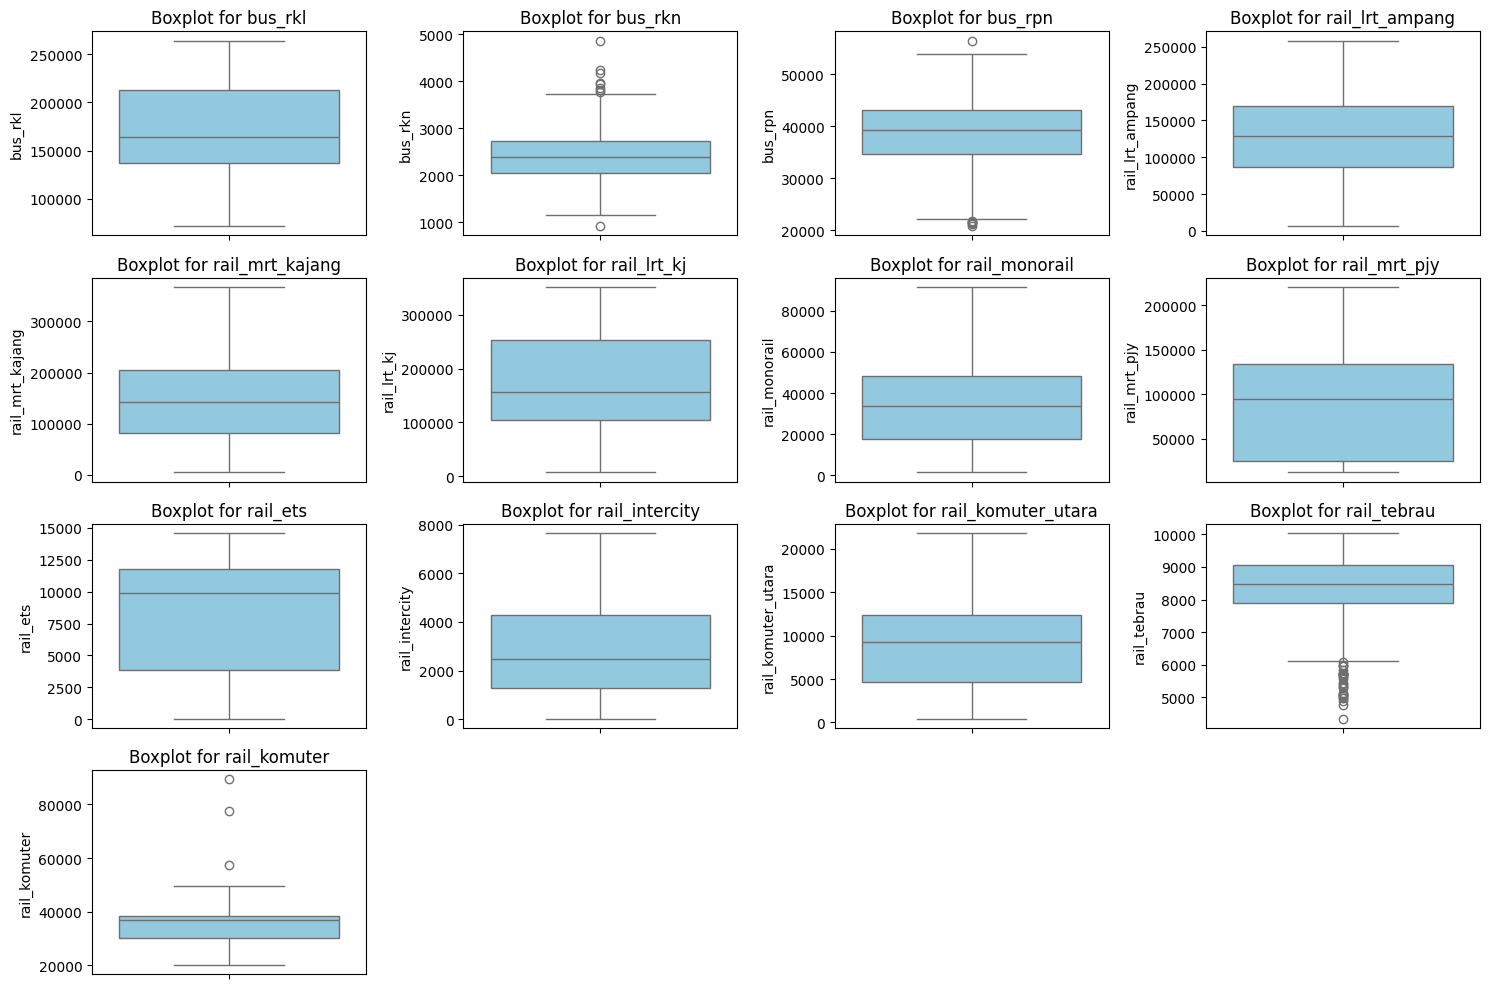

In [5]:
numerical_columns = data.select_dtypes(include=['number']).columns

# Set up figure size
plt.figure(figsize=(15, 10))

# Create subplots for all numerical features
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust layout based on the number of features
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f"Boxplot for {col}")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

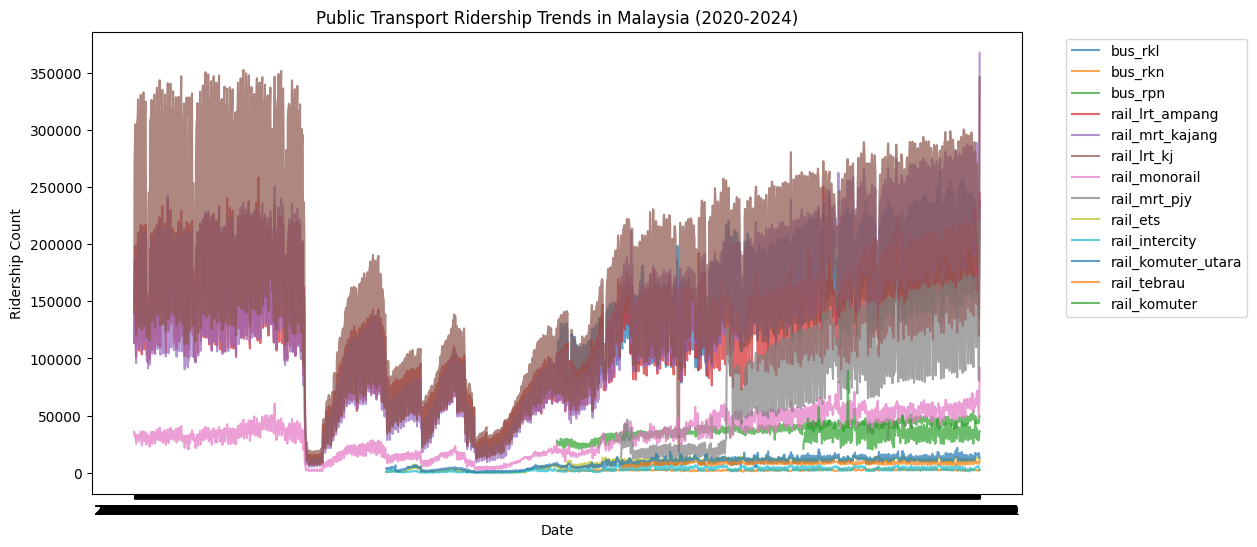

In [6]:
## Plot ridership trends over time
plt.figure(figsize=(12,6))
for col in data.columns[1:]:  # Exclude 'date'
    plt.plot(data['date'], data[col], label=col, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Ridership Count")
plt.title("Public Transport Ridership Trends in Malaysia (2020-2024)")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.show()

#### Ridership Trends Over Time
- **Plotted ridership trends** from **2020 to 2024**.
- Observed major fluctuations in ridership due to:
  - **COVID-19 lockdown effects** in 2020-2021.
  - **Post-pandemic recovery** in 2022-2023.
  - **Seasonal variations** in public transport usage.

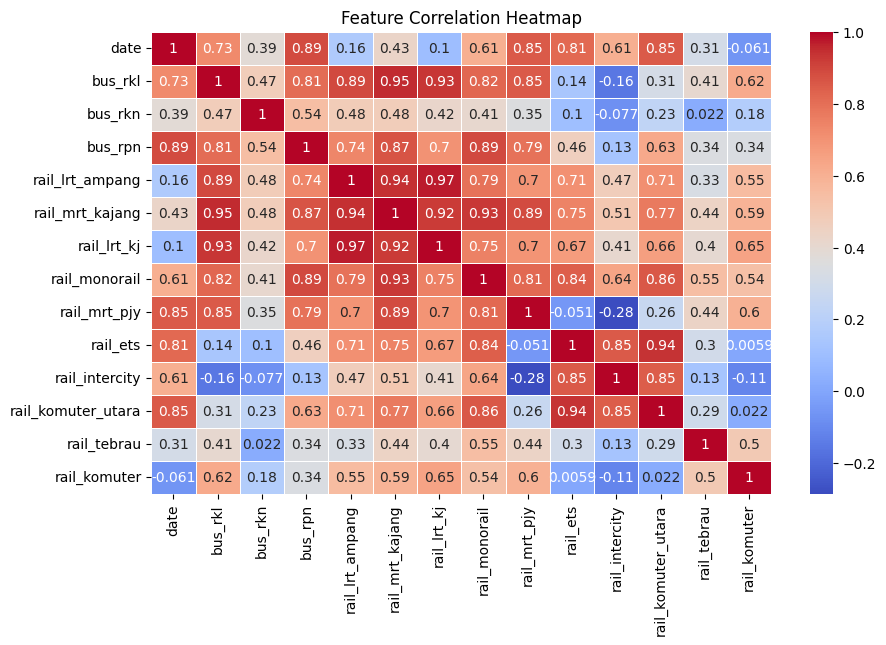

In [7]:
# Convert date column to datetime format and filter for years 2020 to 2024
data['date'] = pd.to_datetime(data['date'])
filtered_data = data[(data['date'].dt.year >= 2022) & (data['date'].dt.year <= 2024)]

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

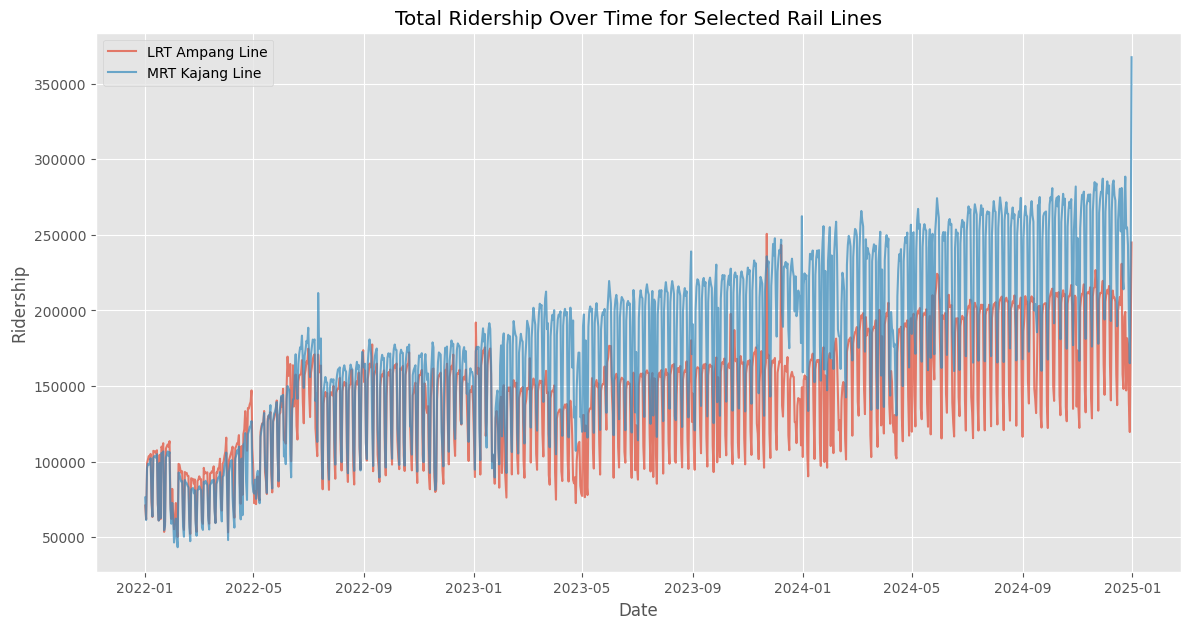

In [8]:
# Visualizing total ridership over time for selected rail lines
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(filtered_data['date'], filtered_data['rail_lrt_ampang'], label='LRT Ampang Line', alpha=0.7)
ax.plot(filtered_data['date'], filtered_data['rail_mrt_kajang'], label='MRT Kajang Line', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Ridership')
ax.set_title('Total Ridership Over Time for Selected Rail Lines')
ax.legend()
plt.show()

# Preprocessing 

In [9]:
# Handling missing values and standardizing data for PCA
imputer = SimpleImputer(strategy='mean')
filtered_data_imputed = imputer.fit_transform(filtered_data.drop(columns='date'))  # Exclude date for PCA
scaler = StandardScaler()
filtered_data_scaled = scaler.fit_transform(filtered_data_imputed)

In [10]:
data.isnull().sum()

date                     0
bus_rkl               1096
bus_rkn               1096
bus_rpn               1096
rail_lrt_ampang          0
rail_mrt_kajang          0
rail_lrt_kj              0
rail_monorail            0
rail_mrt_pjy          1262
rail_ets               653
rail_intercity         653
rail_komuter_utara     653
rail_tebrau           1265
rail_komuter          1734
dtype: int64

In [11]:
# Handle missing values (Forward Fill and Backward Fill)
data = data.ffill()  # Forward fill missing values
data = data.bfill()  # Backward fill missing values

In [12]:
data.isnull().sum()

date                  0
bus_rkl               0
bus_rkn               0
bus_rpn               0
rail_lrt_ampang       0
rail_mrt_kajang       0
rail_lrt_kj           0
rail_monorail         0
rail_mrt_pjy          0
rail_ets              0
rail_intercity        0
rail_komuter_utara    0
rail_tebrau           0
rail_komuter          0
dtype: int64

Since ridership depends on time, feature engineering can improve predictions:

## Extract Useful Features

In [13]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend flag

## Convert ‘date’ to datetime format:

In [14]:
data['date'] = pd.to_datetime(data['date'])

## Feature Scaling & Normalization

In [15]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

## PCA

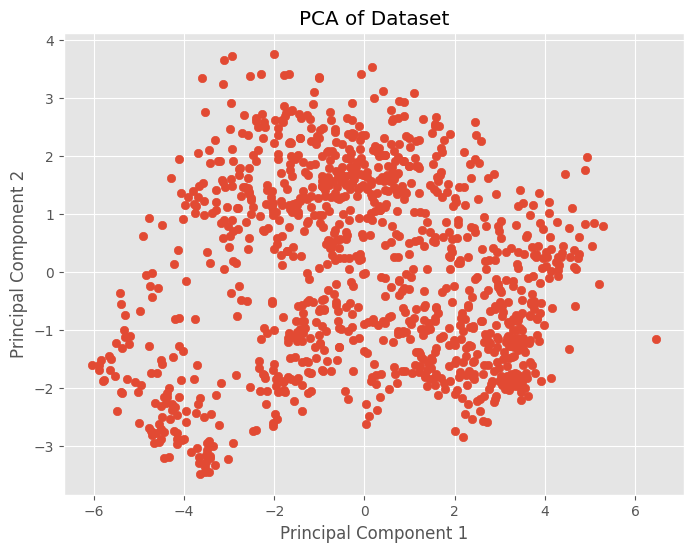

In [16]:
# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(filtered_data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
explained_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Dataset')
plt.show()

### Principal Component Analysis (PCA)**
- Applied **PCA** to reduce dimensionality while preserving variance.
- Found that **2 principal components** explain most of the variation in ridership patterns.

# Modeling 

In [17]:
# ---------------------------------------------------------------------
# Load Dataset
# ---------------------------------------------------------------------
data_path = "ridership_headline.csv"  # <-- Change if needed
data = pd.read_csv(data_path)
data['date'] = pd.to_datetime(data['date'])

# ---------------------------------------------------------------------
# Create Lag Features (7 days) for LRT & MRT
# ---------------------------------------------------------------------
for i in range(1, 8):
    data[f'rail_lrt_ampang_lag_{i}'] = data['rail_lrt_ampang'].shift(i)
    data[f'rail_mrt_kajang_lag_{i}'] = data['rail_mrt_kajang'].shift(i)
data.dropna(inplace=True)

# ---------------------------------------------------------------------
# Separate Features and Targets
# ---------------------------------------------------------------------
# Features: All lag columns (assumes order: LRT lags first, then MRT lags)
features = data.drop(columns=['date', 'rail_lrt_ampang', 'rail_mrt_kajang'])
target_lrt = data['rail_lrt_ampang'].values.reshape(-1, 1)  # shape (n,1)
target_mrt = data['rail_mrt_kajang'].values.reshape(-1, 1)   # shape (n,1)

# ---------------------------------------------------------------------
# Handle Missing Values & Scale the Features
# ---------------------------------------------------------------------
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
feature_scaler = MinMaxScaler()  # or StandardScaler()
features_scaled = feature_scaler.fit_transform(features_imputed)

# ---------------------------------------------------------------------
# Scale the TARGETS (if necessary)
# ---------------------------------------------------------------------
lrt_scaler = MinMaxScaler()  # separate scaler for LRT target
mrt_scaler = MinMaxScaler()  # separate scaler for MRT target
target_lrt_scaled = lrt_scaler.fit_transform(target_lrt)
target_mrt_scaled = mrt_scaler.fit_transform(target_mrt)

# ---------------------------------------------------------------------
# Train-Test Split (for demonstration; ideally use chronological split)
# ---------------------------------------------------------------------
X_train_lrt, X_test_lrt, y_train_lrt, y_test_lrt = train_test_split(
    features_scaled, target_lrt_scaled, test_size=0.2, random_state=42
)
X_train_mrt, X_test_mrt, y_train_mrt, y_test_mrt = train_test_split(
    features_scaled, target_mrt_scaled, test_size=0.2, random_state=42
)

# ---------------------------------------------------------------------
# Train Ridge Regression Models for LRT and MRT
# ---------------------------------------------------------------------
ridge_lrt = Ridge(alpha=1.0)
ridge_lrt.fit(X_train_lrt, y_train_lrt.ravel())

ridge_mrt = Ridge(alpha=1.0)
ridge_mrt.fit(X_train_mrt, y_train_mrt.ravel())

# ---------------------------------------------------------------------
# Evaluate on Test Set (Scaled -> Inverse -> Compare)
# ---------------------------------------------------------------------
# LRT Evaluation
lrt_preds_test_scaled = ridge_lrt.predict(X_test_lrt)
lrt_preds_test = lrt_scaler.inverse_transform(lrt_preds_test_scaled.reshape(-1, 1))
y_test_lrt_orig = lrt_scaler.inverse_transform(y_test_lrt.reshape(-1, 1))
print("=== LRT Ampang Test ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test_lrt_orig, lrt_preds_test)))
print("R2:", r2_score(y_test_lrt_orig, lrt_preds_test))

# MRT Evaluation
mrt_preds_test_scaled = ridge_mrt.predict(X_test_mrt)
mrt_preds_test = mrt_scaler.inverse_transform(mrt_preds_test_scaled.reshape(-1, 1))
y_test_mrt_orig = mrt_scaler.inverse_transform(y_test_mrt.reshape(-1, 1))
print("\n=== MRT Kajang Test ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test_mrt_orig, mrt_preds_test)))
print("R2:", r2_score(y_test_mrt_orig, mrt_preds_test))

=== LRT Ampang Test ===
RMSE: 6926.2723112945405
R2: 0.9605584472529795

=== MRT Kajang Test ===
RMSE: 6106.478305572088
R2: 0.975922152339982


# Checking for Overfitting

In [18]:
# Perform cross-validation for LRT Ampang
cv_r2_lrt = cross_val_score(ridge_lrt, X_train_lrt, y_train_lrt, cv=5, scoring='r2')
cv_mse_lrt = cross_val_score(ridge_lrt, X_train_lrt, y_train_lrt, cv=5, scoring='neg_mean_squared_error')

# Perform cross-validation for MRT Kajang
cv_r2_mrt = cross_val_score(ridge_mrt, X_train_mrt, y_train_mrt, cv=5, scoring='r2')
cv_mse_mrt = cross_val_score(ridge_mrt, X_train_mrt, y_train_mrt, cv=5, scoring='neg_mean_squared_error')

# Print Cross-Validation Scores
print("Cross-Validation R² Score (LRT Ampang):", np.mean(cv_r2_lrt))
print("Cross-Validation MSE (LRT Ampang):", -np.mean(cv_mse_lrt))
print("Cross-Validation R² Score (MRT Kajang):", np.mean(cv_r2_mrt))
print("Cross-Validation MSE (MRT Kajang):", -np.mean(cv_mse_mrt))

Cross-Validation R² Score (LRT Ampang): 0.9285072250368069
Cross-Validation MSE (LRT Ampang): 0.0034675218740010893
Cross-Validation R² Score (MRT Kajang): 0.9706139856999055
Cross-Validation MSE (MRT Kajang): 0.0008872766600502016


These learning curves for Ridge Regression on LRT Ampang and MRT Kajang show that there is no significant overfitting in the models.

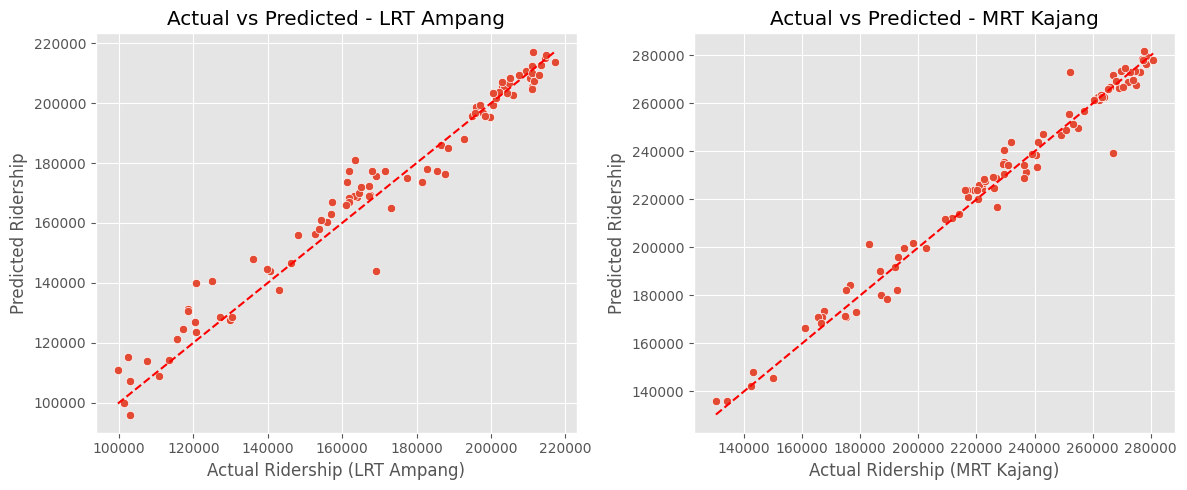

In [19]:
plt.figure(figsize=(12, 5))

# Plot for LRT Ampang
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_lrt_orig.flatten(), y=lrt_preds_test.flatten())
plt.plot([y_test_lrt_orig.min(), y_test_lrt_orig.max()], 
         [y_test_lrt_orig.min(), y_test_lrt_orig.max()], 'r--')
plt.xlabel("Actual Ridership (LRT Ampang)")
plt.ylabel("Predicted Ridership")
plt.title("Actual vs Predicted - LRT Ampang")

# Plot for MRT Kajang
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_mrt_orig.flatten(), y=mrt_preds_test.flatten())
plt.plot([y_test_mrt_orig.min(), y_test_mrt_orig.max()], 
         [y_test_mrt_orig.min(), y_test_mrt_orig.max()], 'r--')
plt.xlabel("Actual Ridership (MRT Kajang)")
plt.ylabel("Predicted Ridership")
plt.title("Actual vs Predicted - MRT Kajang")

plt.tight_layout()
plt.show()

These scatter plots show how closely the model’s predicted ridership values match the actual ridership data for both LRT Ampang and MRT Kajang. Most points lie near the diagonal reference line, indicating that the predictions are reasonably accurate. The closer the points are to this line, the smaller the error between predicted and actual values. A tight clustering around the diagonal suggests the model is doing a good job of capturing the overall ridership patterns for both train lines.

# Result

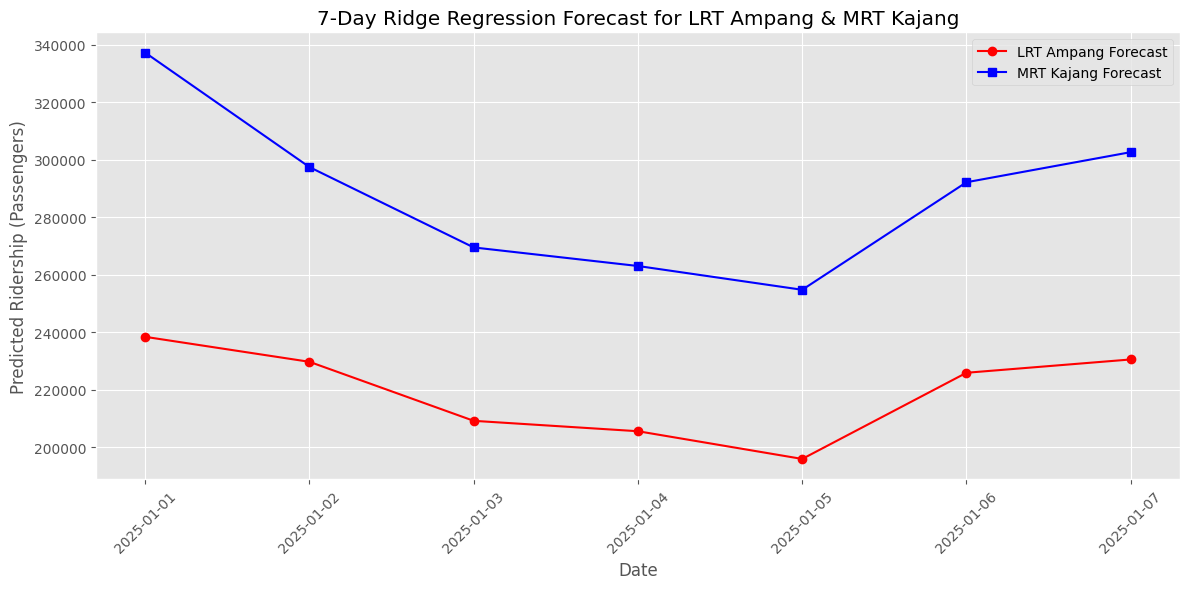


Final Forecast DataFrame:
        date  LRT_Ampang_Prediction  MRT_Kajang_Prediction
0 2025-01-01                 238428                 337254
1 2025-01-02                 229738                 297458
2 2025-01-03                 209218                 269512
3 2025-01-04                 205599                 263057
4 2025-01-05                 195961                 254784
5 2025-01-06                 225928                 292185
6 2025-01-07                 230556                 302651


In [20]:
# ---------------------------------------------------------------------
# Multi-step Forecast (7 days) in the Correct Scale
# ---------------------------------------------------------------------
# Use the last row of the original feature DataFrame to initialize the forecast.
last_row_features = features.iloc[-1].values.reshape(1, -1)  # shape (1,14)
last_row_features_scaled = feature_scaler.transform(last_row_features)

# Assuming the order is: first 7 columns for LRT lags, next 7 for MRT lags.
lrt_lags_scaled = last_row_features_scaled[0, :7]
mrt_lags_scaled = last_row_features_scaled[0, 7:]

forecast_dates = []
lrt_forecasts = []
mrt_forecasts = []
start_date = data['date'].iloc[-1] + pd.Timedelta(days=1)

for i in range(7):
    # Build today's feature vector from current lag values (scaled)
    day_feat_scaled = np.concatenate([lrt_lags_scaled, mrt_lags_scaled]).reshape(1, -1)
    
    # Predict in scaled domain
    pred_lrt_scaled = ridge_lrt.predict(day_feat_scaled)[0]
    pred_mrt_scaled = ridge_mrt.predict(day_feat_scaled)[0]
    
    # Inverse-transform to get actual passenger counts
    pred_lrt_real = lrt_scaler.inverse_transform([[pred_lrt_scaled]])[0, 0]
    pred_mrt_real = mrt_scaler.inverse_transform([[pred_mrt_scaled]])[0, 0]
    
    # Optionally, round to whole numbers
    pred_lrt_count = int(round(pred_lrt_real))
    pred_mrt_count = int(round(pred_mrt_real))
    
    # Record the forecast date and predictions
    forecast_date = start_date + pd.Timedelta(days=i)
    forecast_dates.append(forecast_date)
    lrt_forecasts.append(pred_lrt_count)
    mrt_forecasts.append(pred_mrt_count)
    
    # Update lag arrays (still in scaled domain):
    # Shift right by one position and insert today's prediction at the beginning (lag_1)
    lrt_lags_scaled = np.roll(lrt_lags_scaled, 1)
    mrt_lags_scaled = np.roll(mrt_lags_scaled, 1)
    lrt_lags_scaled[0] = pred_lrt_scaled
    mrt_lags_scaled[0] = pred_mrt_scaled

# Build a DataFrame for the forecast results.
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'LRT_Ampang_Prediction': lrt_forecasts,
    'MRT_Kajang_Prediction': mrt_forecasts
})

# ---------------------------------------------------------------------
# Visualize the Forecast
# ---------------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(forecast_df['date'], forecast_df['LRT_Ampang_Prediction'],
         marker='o', color='red', label='LRT Ampang Forecast')
plt.plot(forecast_df['date'], forecast_df['MRT_Kajang_Prediction'],
         marker='s', color='blue', label='MRT Kajang Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Ridership (Passengers)')
plt.title('7-Day Ridge Regression Forecast for LRT Ampang & MRT Kajang')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nFinal Forecast DataFrame:")
print(forecast_df)

LRT Ampang and MRT Kajang ridership depend on bus connectivity, transfers between rail lines, and suburban commuters. Better bus routes, smoother transfers, and improved first-mile/last-mile access can increase usage. External factors like events and seasons also affect demand, so further study is needed.

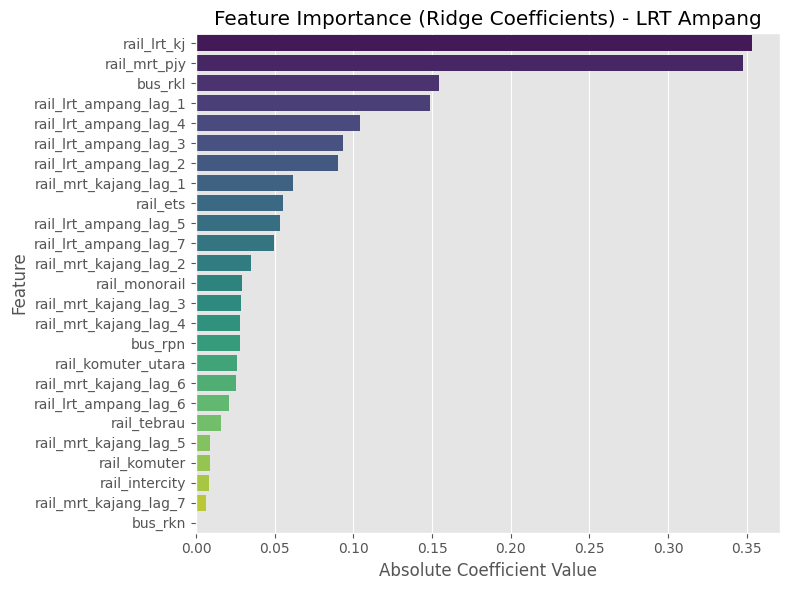

In [21]:
# Assuming 'features' is a DataFrame or you have a list of feature names
feature_names = features.columns  # or a list of column names
coeff_lrt = ridge_lrt.coef_       # The learned coefficients from your Ridge model

# Create a DataFrame of feature names & coefficients
coeff_df_lrt = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeff_lrt
})

# Sort by absolute value of coefficients
coeff_df_lrt['AbsCoefficient'] = coeff_df_lrt['Coefficient'].abs()
coeff_df_lrt.sort_values('AbsCoefficient', ascending=False, inplace=True)

# Horizontal bar chart of absolute coefficient values
plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df_lrt, x='AbsCoefficient', y='Feature', orient='h', hue='Feature', dodge=False, palette='viridis')
plt.title('Feature Importance (Ridge Coefficients) - LRT Ampang')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

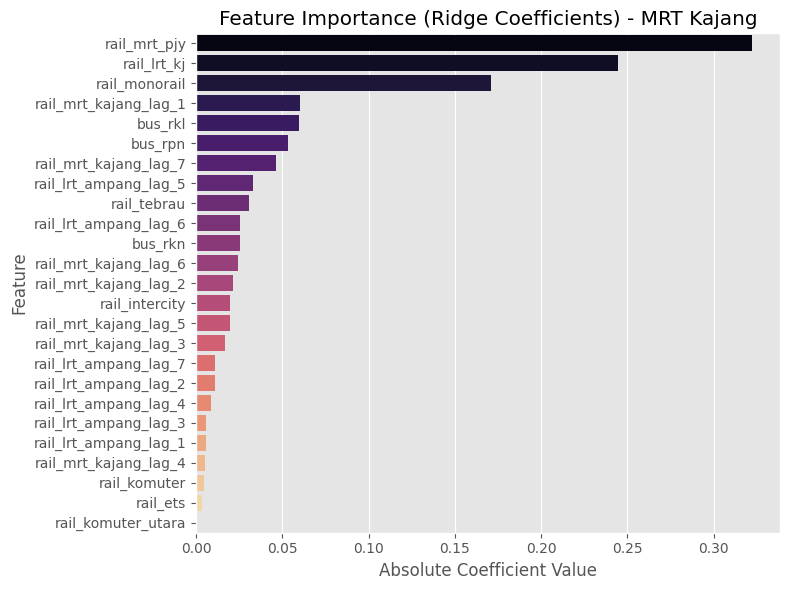

In [22]:
# Repeat the same process for MRT Kajang
coeff_mrt = ridge_mrt.coef_

coeff_df_mrt = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeff_mrt
})

coeff_df_mrt['AbsCoefficient'] = coeff_df_mrt['Coefficient'].abs()
coeff_df_mrt.sort_values('AbsCoefficient', ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df_mrt, x='AbsCoefficient', y='Feature', hue='Feature', dodge=False, orient='h', palette='magma')
plt.title('Feature Importance (Ridge Coefficients) - MRT Kajang')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

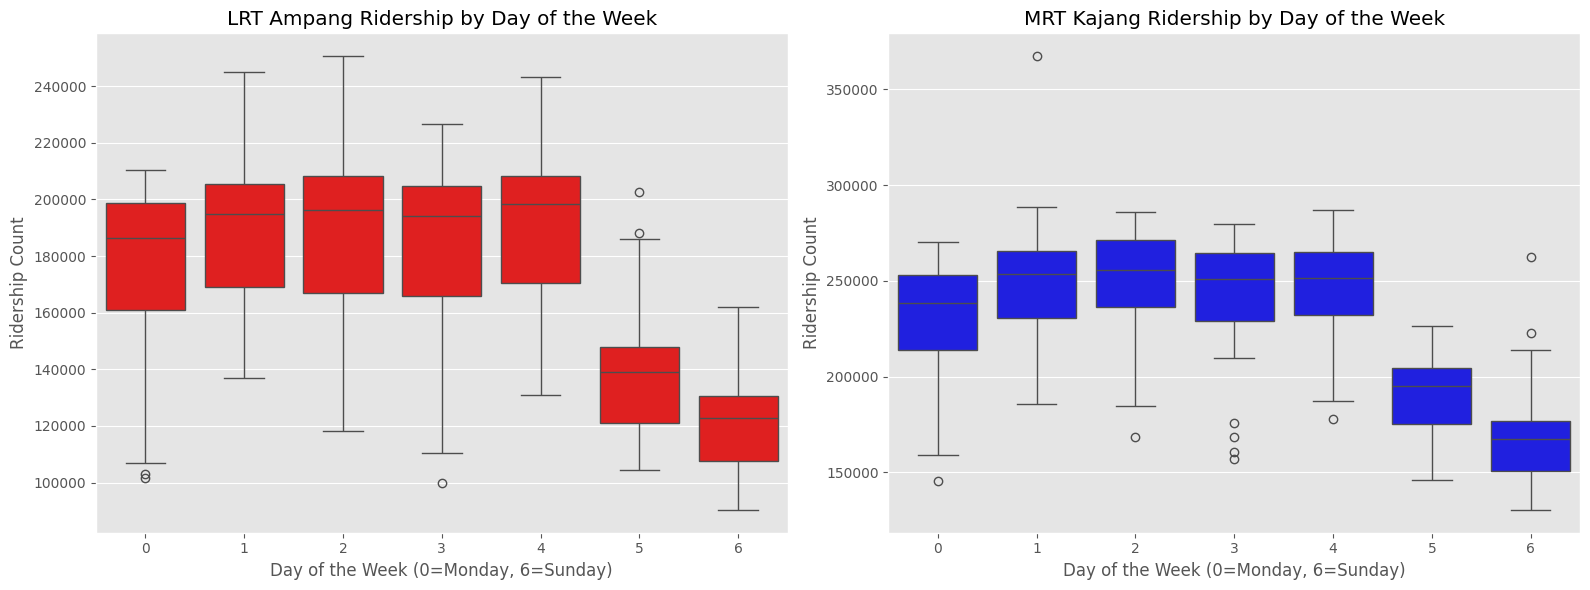

In [23]:
# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['date'].dt.dayofweek

# Create subplots for both LRT Ampang and MRT Kajang
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LRT Ampang Boxplot
sns.boxplot(ax=axes[0], x='day_of_week', y='rail_lrt_ampang', data=data, color="red")
axes[0].set_title("LRT Ampang Ridership by Day of the Week")
axes[0].set_xlabel("Day of the Week (0=Monday, 6=Sunday)")
axes[0].set_ylabel("Ridership Count")

# MRT Kajang Boxplot 
sns.boxplot(ax=axes[1], x='day_of_week', y='rail_mrt_kajang', data=data, color="blue")
axes[1].set_title("MRT Kajang Ridership by Day of the Week")
axes[1].set_xlabel("Day of the Week (0=Monday, 6=Sunday)")
axes[1].set_ylabel("Ridership Count")

# Show the plots
plt.tight_layout()
plt.show()

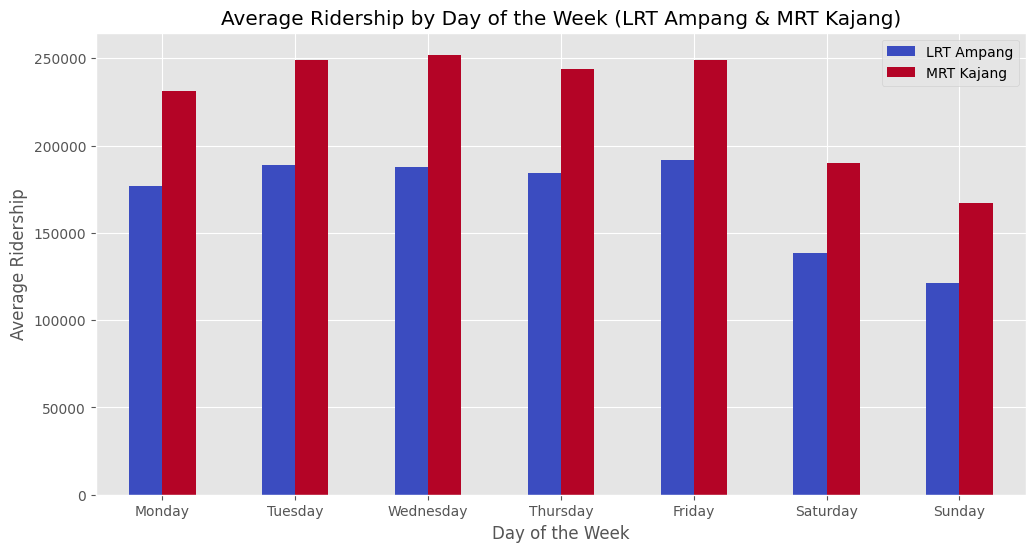

In [24]:
# Ensure 'day_of_week' is extracted
data['day_of_week'] = data['date'].dt.dayofweek  # Monday = 0, Sunday = 6

# Group by day of the week and calculate mean ridership
avg_ridership = data.groupby('day_of_week')[['rail_lrt_ampang', 'rail_mrt_kajang']].mean()

# Plot the average ridership
plt.figure(figsize=(12, 6))
avg_ridership.plot(kind='bar', colormap="coolwarm", ax=plt.gca())

# Labels and title
plt.title("Average Ridership by Day of the Week (LRT Ampang & MRT Kajang)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Ridership")
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.legend(["LRT Ampang", "MRT Kajang"])

# Show the plot
plt.show()

# Conclusion


### How will LRT Ampang and MRT Kajang ridership change next month?
Our 7-day forecast, combined with weekly patterns, shows that next month’s ridership will likely follow similar weekday/weekend cycles and remain in a similar range as the forecast.

### What are the key variables affecting ridership?
The biggest influencers are each line’s own past ridership (lag features), along with certain intermodal connections like `rail_mrt_pjy` or `rail_monorail`. This implies that recent travel behavior and related transit lines play a large role.

### Daily, weekly, and monthly ridership variations
The boxplots and bar charts confirm that ridership is consistently higher on weekdays, especially around Mondays and Fridays, and tends to dip on weekends. Operators can use these insights to optimize train frequency and resource allocation, while passengers can choose lower-demand periods for more comfortable travel.

Our forecasting model uses historical ridership data to predict the number of passengers for the upcoming week on both LRT Ampang and MRT Kajang. The forecast can help you plan your trips by indicating which days might be more crowded. If the model predicts high ridership on a particular weekday, you might consider adjusting your schedule or exploring alternative transportation options to enjoy a less crowded commute.

# Executive Summary

This project focuses on predicting public transportation ridership trends in Malaysia using historical data from various rail systems, including LRT, MRT, Monorail, and KTM. The primary objectives are to forecast short-term ridership, analyze key influencing factors, and examine seasonal trends to optimize public transport operations. Using machine learning techniques, specifically Ridge Regression, we developed predictive models with lag features, achieving high accuracy (R²: 0.96 for LRT Ampang, 0.97 for MRT Kajang). The analysis revealed that past ridership, intermodal connections, and external events significantly impact demand. Key findings indicate higher weekday ridership, weekend declines, and fluctuations influenced by COVID-19. A 7-day ridership forecast was generated to assist transportation planners in resource allocation and scheduling. This study provides actionable insights to enhance public transit efficiency, and future improvements could include incorporating external socioeconomic factors for more robust predictions.